# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

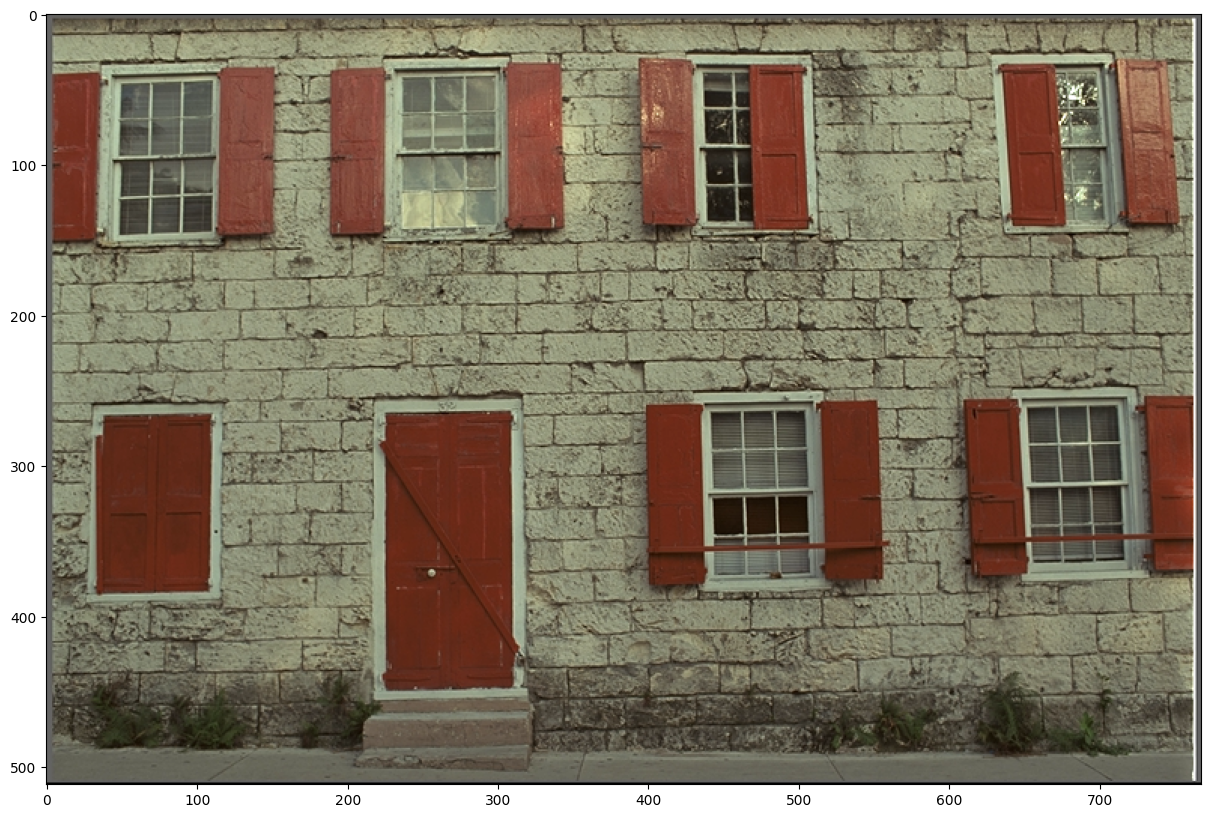

In [92]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [93]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
img = img/255
img[img > 1] = 1
unsharp = cv2.GaussianBlur(img, ksize=(7,7), sigmaX = 5)

In [ ]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img - unsharp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x219cac9a350>)

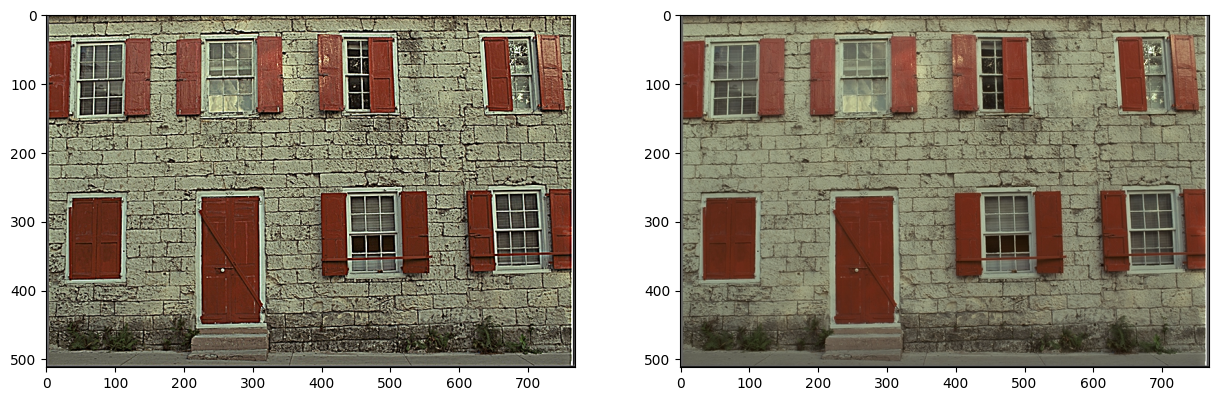

In [112]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = img + diff  * 1.6
sharpened[sharpened > 1] = 1
plt.subplot(121), plt.imshow(sharpened)
plt.subplot(122), plt.imshow(img)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

##### 1. The best values for amount lies between 1 and 2 for my opinion
##### 2. Too small value of amount doesn't sharp well the original image
##### 3. Too large value of amount sharp image too much and can lead to deleting important things from image